# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [2]:
# Question 1: Construct a function which solves equation (1) given the parameters.

#import packages
import math
from scipy import optimize


# choose some parameters

m = 1 # cash on hand
v = 10 # scales for disutility of labor
e = 0.3 # Frisch elasticity of labor supply
tau0 = 0.4 # labor income tax
tau1 = 0.1 # top bracket labor income tax
k = 0.4 # cut off bracket top labor income tax

# define the equation for the total resources
def x(m, w, l, tau0, tau1, k) : 
    if w*l-k>0:
        return m+w*l-(tau0*w*l+tau1*(w*l-k))
    else:
        return m+w*l-(tau0*w*l)

# define the utility function
def utility_func(l, c, e, v) :
    c=x(m,w,l,tau0,tau1,k) # in the optimum we will spend all our money
    return math.log(c,10) - v * ((l ** (1 + (1 / e))) / (1 + (1 / e)))

# we can only minimize, therefore we need to set a minus in front of the function

def value_of_choice(l, e, v, m, w, tau0, tau1, k):
    c = x(m, w, l, tau0, tau1, k)
    return -utility_func(l, c, e, v)

# use the solver, set bounds for l to 0,1
def solve_equation(e, v, m, w, tau0, tau1, k) : 
    solution = optimize.minimize_scalar(value_of_choice, method='bounded', bounds=(0, 1), args=(e, v, m, w, tau0, tau0, k))
    l = solution.x 
    c = x(m, w, l, tau0, tau1, k)
    u = utility_func(l, c, e, v)
    return l, c, u

# Question 2

[0.5        0.51010101 0.52020202 0.53030303 0.54040404 0.55050505
 0.56060606 0.57070707 0.58080808 0.59090909 0.6010101  0.61111111
 0.62121212 0.63131313 0.64141414 0.65151515 0.66161616 0.67171717
 0.68181818 0.69191919 0.7020202  0.71212121 0.72222222 0.73232323
 0.74242424 0.75252525 0.76262626 0.77272727 0.78282828 0.79292929
 0.8030303  0.81313131 0.82323232 0.83333333 0.84343434 0.85353535
 0.86363636 0.87373737 0.88383838 0.89393939 0.9040404  0.91414141
 0.92424242 0.93434343 0.94444444 0.95454545 0.96464646 0.97474747
 0.98484848 0.99494949 1.00505051 1.01515152 1.02525253 1.03535354
 1.04545455 1.05555556 1.06565657 1.07575758 1.08585859 1.0959596
 1.10606061 1.11616162 1.12626263 1.13636364 1.14646465 1.15656566
 1.16666667 1.17676768 1.18686869 1.1969697  1.20707071 1.21717172
 1.22727273 1.23737374 1.24747475 1.25757576 1.26767677 1.27777778
 1.28787879 1.2979798  1.30808081 1.31818182 1.32828283 1.33838384
 1.34848485 1.35858586 1.36868687 1.37878788 1.38888889 1.39898

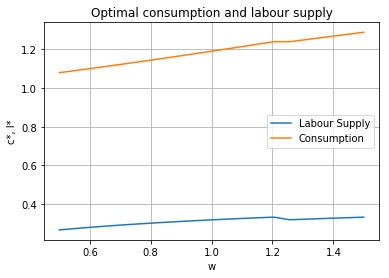

In [4]:
# Question 2: Plot l* and c* as functions of w in the range 0.5 to 1.5.

# import numpy
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt

N=100
# generate a list of all the values for w, 100 values
W=np.linspace(0.5,1.5,N) # less values for the start
print(W)

# generate an empty list for the l values
L=np.zeros(N)
print(L)

C=np.zeros(N)
print(C)

U=np.zeros(N)
print(U)


# find the l values that solve the maximization problem

for i in range(W.size) :
    w=W[i]
    l,c,u = solve_equation(e, v, m, w, tau0, tau1, k)
    L[i]=l
    C[i]=c
    U[i]=u


print(C)
print(L)
print(U)

# make tests
print("l,c,u="+str(solve_equation(e,v,m,W[0],tau0,tau1,k)))
print(L[0])
print(C[0])
print(U[0])

print("l,c,u="+str(solve_equation(e,v,m,W[75],tau0,tau1,k)))
print(L[75])
print(C[75])
print(U[75])


plt.plot(W, L)
plt.plot(W,C)
plt.grid(True)
plt.xlabel("w")
plt.ylabel("c*, l*")
plt.legend(["Labour Supply", "Consumption"])
plt.title("Optimal consumption and labour supply")
plt.show()


# Question 3

In [5]:
# Question 3: Calculate the total tax revenue given by

# code
N = 10000
np.random.seed(1000)
W_i=np.random.uniform(low=0.5, high=1.5, size=N)
print(W_i) # now we have the uniformly distrbuted wages

def tax_revenue(e, v, m, tau0, tau1, k, N) :
    total_tax = 0 # set the total tax equal to zero in the beginning
    for i in range(0,N) :
        w_i=W_i[i] #pick one of the wages
        l_i, _, _ = solve_equation(e, v, m, w_i, tau0, tau1, k)
        total_tax += (tau0 * w_i * l_i + tau1 * max(w_i * l_i - k, 0)) # add the tax revenue
    return total_tax

T=tax_revenue(e, v, m, tau0, tau1, k, N)

print("The total tax revenue is " + str(T))

[1.15358959 0.61500694 1.45028286 ... 1.3943493  0.95239636 1.2226417 ]
The total tax revenue is 1345.7596892585047


# Question 4

In [7]:
# Question 4: What would the tax revenue be if instead e = 0.1?

# define the new elasticity
e2=0.1

# call the previous defined function and 
T2=tax_revenue(e2,v,m,tau0,tau1,k,N)
print("The new total tax revenue with e=0.1 is " + str(T2))

3011.410723734836
The new total tax revenue with e=0.1 is 3011.410723734836


# Question 5

In [ ]:
# Question 5: Which 0, 1 and  would you suggest her to implement?
#Report the tax revenue you expect to obtain.

# Conclusion

ADD CONCISE CONLUSION.